# RSML architecture

Read architecture from RSML file and run a simulation to illustrate how to use the RSML format (http://rootsystemml.github.io/). The architecture is the pool of maize roots used in [Bauget et al. 2023](https://doi.org/10.1093/jxb/erac471).

Point to the source files if the notebook is run locally, from a git repository clone for example, without openalea.hydroroot installation, but only the dependencies installed.

In [17]:
%matplotlib inline

In [15]:
import openalea.rsml as rsml
from openalea.hydroroot import radius
from openalea.hydroroot.main import hydroroot_flow
from openalea.widgets.plantgl import PlantGL # notebook viewer 3D
from openalea.plantgl.algo.view import view # 2D view
from openalea.hydroroot.display import mtg_scene, property_scale_bar
from openalea.hydroroot.hydro_io import import_rsml_to_discrete_mtg

## Read RSML

Read the RSML file and convert it into a *continuous* MTG. This is a MTG where each root (primary and lateral) is represented by one vertex. The geometry of each root is then stored in g_c.property('geometry').

In [3]:
g_c = rsml.rsml2mtg('data/maize_3P2.rsml')

To be used in HydroRoot the MTG has to be converted to a *discrete* form of MTG, i.e. each vertex represent a representative elementary volume of a given length for example $10^{-4}$ m. In HydroRoot the lengths are in meter, therefore we must retrieve the resolution and the unit of the RSML file. 

In [4]:
resolution = g_c.graph_properties()['metadata']['resolution'] # pixel to unit
unit = g_c.graph_properties()['metadata']['unit']
print(unit)

m


## Build the discrete MTG

In [5]:
g = import_rsml_to_discrete_mtg(g_c, segment_length = 1.0e-4, resolution = resolution)

## Run calculation

Calculate some properties needed to simulate a sap flux from the root under overpressure. 

In [6]:
g = radius.ordered_radius(g, 7.0e-5, 0.7) # root radii
g = radius.compute_relative_position(g) # Compute the position of each segment relative to the axis bearing it

Some conductance data versus distance to tip

In [7]:
k_radial_data=([0, 0.43],[174.7,174.7])
K_axial_data=([0, 0.06, 0.13, 0.18, 0.23, 0.29, 0.43],[2.301E-04, 2.266E-04, 2.230E-02, 2.196E-02, 2.172E-02, 2.577E-02, 1.954E-01])

Flux and equivalent conductance calculation, for a root in an external hydroponic medium at 0.4 MPa, its base at 0.1 MPa, and with the conductances set above.

In [8]:
g, keq, jv = hydroroot_flow(g, psi_e = 0.4, psi_base = 0.1, axial_conductivity_data = K_axial_data, radial_conductivity_data = k_radial_data)

In [9]:
print('equivalent root conductance (microL/s/MPa): ',keq, 'sap flux (microL/s): ', jv)

equivalent root conductance (microL/s/MPa):  0.1816477602886562 sap flux (microL/s):  0.05449432808659687


## Display the local water uptake heatmap

to reduce notebook size we use here a 2D view but you can use the openalea.widgets `PlantGL(s)` to display an interactive 3D view

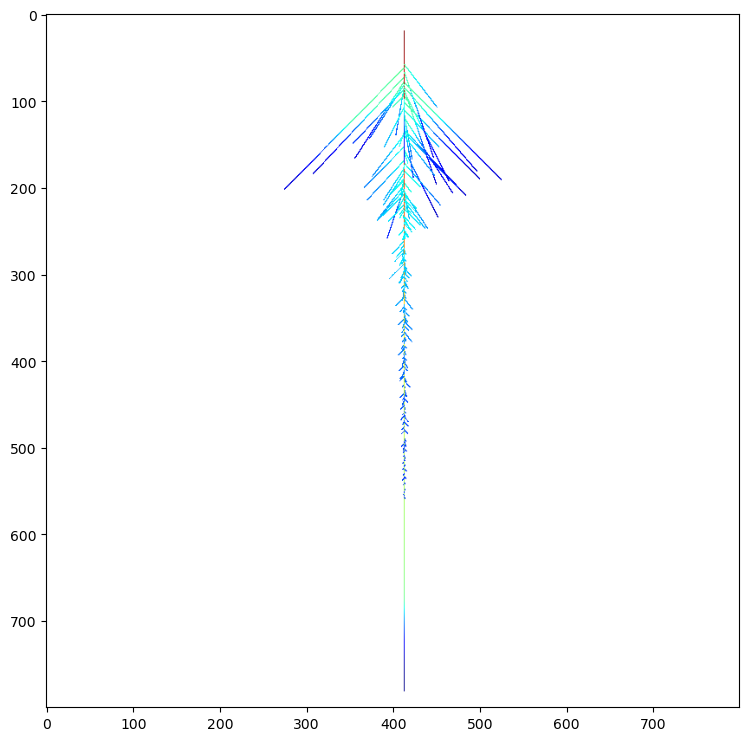

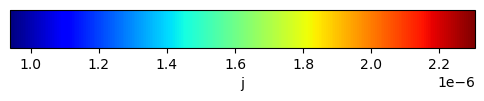

In [19]:
s = mtg_scene(g, prop_cmap = 'j') # create a scene from the mtg with the property j is the radial flux in ul/s
view(s) # use PlantGL(s) to display in 3D
property_scale_bar(g, 'j')

## Display the local hydraulic pressure heatmap

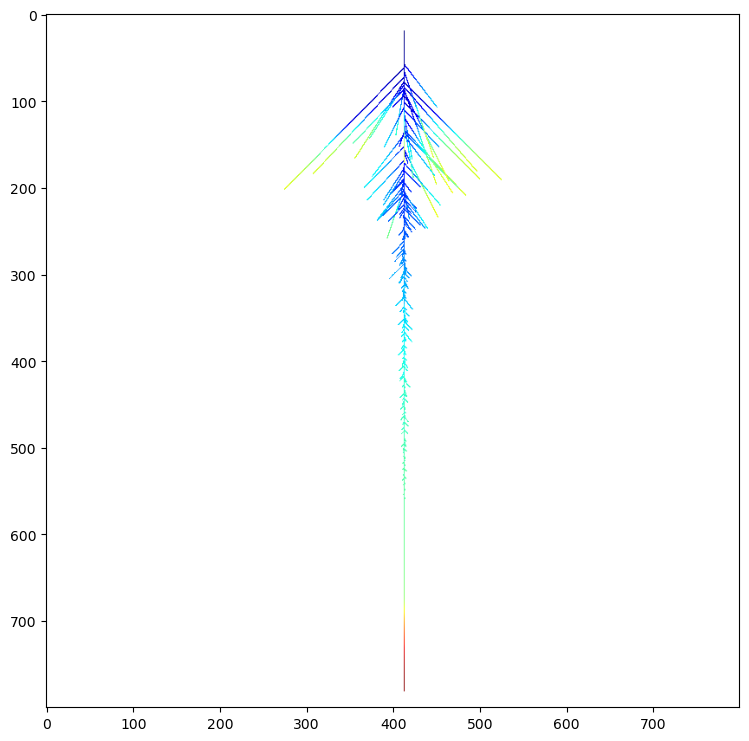

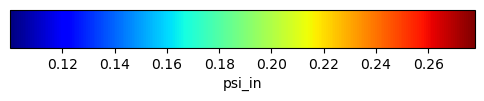

In [18]:
s = mtg_scene(g, prop_cmap = 'psi_in') # create a scene from the mtg with the property psi_in is the local hydrostatic potential (MPa)
view(s) # use PlantGL(s) to display in 3D
property_scale_bar(g, 'psi_in')